In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')





## Lecture 10 ##

## Apply

1. introducedapply
2.allowedustoapplyafunctiontoeachentryinanarry
3.table_name.apply(functioncall,'ColumnName')->returnsarraywhereelementsareoutputoffunction

In [4]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed','Pam'),
    'Birth Year', make_array(1985, 1988, 1967, 1904,1987)
)
staff


#Tablefromlast
#lestaddPamm

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904
Pam,1987


In [6]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person

#letsdefineage

def age(birth_year): #function call birth_year is int variable
    #function returns age of person 
    return 2021-birth_year



In [7]:
greeting('Pam')
age(1987)#try agefuntion

34

In [81]:
greeting('Erin')

'Dunder Mifflin, this is Erin'

In [83]:
staff.apply(greeting, 'Employee')

#Lets apply greeting to the table
 #noticethe return is an array. 
    
#Now try apply with age

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [8]:
def name_and_age(name, year):
    age = age(year)
    return name + ' is ' + str(age)


#letsfixthis

In [86]:
staff.apply(name_and_age, 'Employee', 'Birth Year')
#notice two inputs

array(['Jim is 34', 'Dwight is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')

## Prediction ##

In [9]:
galton = Table.read_table('galton.csv')
galton

#Statistics-make predictions about future anddetermine accuracyof predictions
#reviewexamplefromtextbook
#Two goals 1. Make a prediction and 2. Check theaccuracy
#Containsheights
#Thisdatasetcontainsroughlyathousandentries
#midparentheight=weightaverage


#Wewanttorpredictthechildsheightfromthedatawhentheygrowupandcompareittotheir
#actualheight

#Question:isfanliynumericalorcategorical?

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


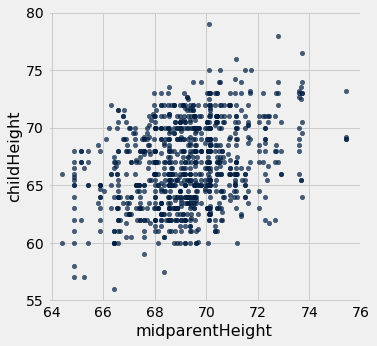

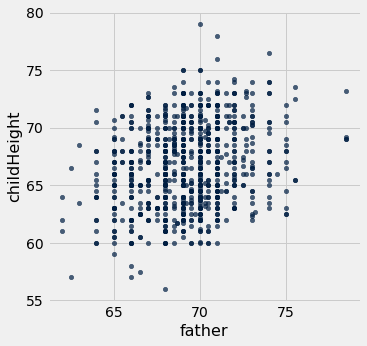

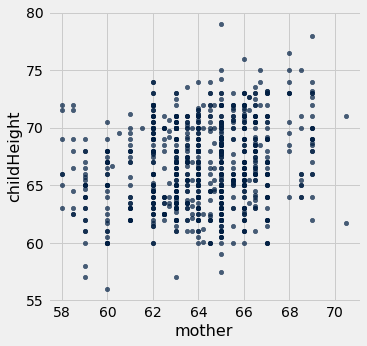

In [13]:
galton.scatter('midparentHeight', 'childHeight')

#Hereisthelrelationshipbetweenmidparentheightandchildheight
#usingscater

#Asmidparenthieghtislargerthenchildsheightishigher
#Thereisaspeardofdata

#midparenthegithis70-childsheighis65

#generallypositiveassociation

#Letslookatfathersheighvschilss

galton.scatter('father', 'childHeight')
galton.scatter('mother', 'childHeight')

#Now_we_would_like_to_predict_childs_height_using_the_dataset

#Suppose_we_have_a_child_not_in_the_dataset_that_has_a_heightMidparent
#of70

#one_prediction_approach_is_the_following:
#1.Takeallpointswithmidparentheightaround70
#2.Findaveragevalueforchildsheights
#3.Predictionistheaverage


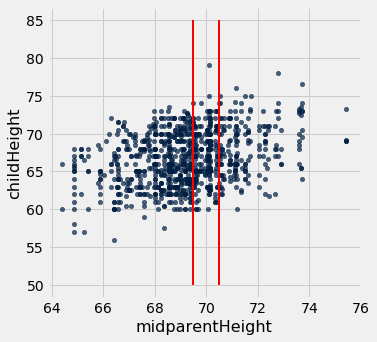

In [17]:



galton.scatter('midparentHeight', 'childHeight')
plots.plot([70.5, 70.5], [50, 85], color='red', lw=2)
plots.plot([69.5, 69.5], [50, 85], color='red', lw=2);

#plots.plot()Drawlinsbetweenx-pointstheny-points

In [21]:
#Nowletscalculatethemeanvalue
#Ourranewillbe.5inch

nearby = galton.where('midparentHeight', are.between(69.5, 70.5))

#nearby
nearby_mean = nearby.column('childHeight').mean()
nearby_mean#thisisourprediction

67.27285067873302

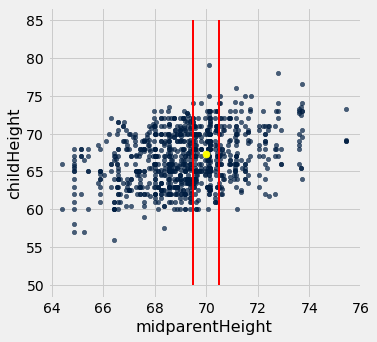

In [24]:
#Lets'supdatthiscodetofitourexample

#So_this_tellsusthatwepredictthechildsheightasanadulttobearound67inches
galton.scatter('midparentHeight', 'childHeight')
plots.plot([69.5, 69.5], [50, 85], color='red', lw=2)
plots.plot([70.5, 70.5], [50, 85], color='red', lw=2)
plots.scatter(70, nearby_mean, color='yellow', s=50);


#The_logic_producing_incalculatingapredictiononheight

In [25]:
def predict(h):#Hereisourfunction
    nearby = galton.where('midparentHeight', are.between(h - 1/4, h + 1/4))#findsmidpartenheightwithin.5
    return nearby.column('childHeight').mean()#returnsaverage


#Changerange
#betteraccuracyin

In [26]:
predict(68)

#Wecancheckourvalue

66.56125

In [27]:
predict(70)

67.51130434782608

In [28]:
predict(73)

70.5

In [31]:
#now_wecanrunthisfunctiononthedatasettoobtainapredictionforeachheigh

predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights




array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.06      , 68.06      ,
       68.06      , 68.06      , 68.06      , 68.06      , 68.06      ,
       66.40512821, 66.40512821, 66.40512821, 66.40512821, 66.40512821,
       66.40512821, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.5       , 69.5       ,
       69.5       , 69.5       , 68.16315789, 67.6028169 , 67.6028169 ,
       67.6028169 , 67.6028169 , 67.6028169 , 67.6028169 , 67.6028169 ,
       67.6028169 , 67.52727273, 69.5       , 69.5       , 69.5       ,
       69.5       , 68.16315789, 68.16315789, 68.16315789, 68.38      ,
       68.38      , 68.38      , 68.38      , 68.38      , 68.38      ,
       68.38      , 68.38      , 68.38      , 67.764     , 67.764     ,
       67.764     , 67.764     , 67.764     , 67.764     , 67.88      ,
       67.88      , 67.88      , 67.81935484, 70.41578947, 70.41

In [35]:
galton = galton.with_column('predictedHeight', predicted_heights)
#addthistothetable
galton

#oneproblem-everyone_in_fabliy_gets_same_prediciton>
#Can_we_make-this-better?
#since-females-we-are-predictin_ghiher-wheremales-we-predictlower

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.06
3,75,64,72.06,2,2,female,68,68.06


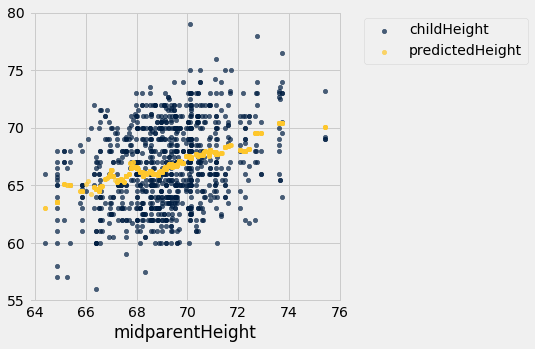

In [34]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

#Scatterplot

#FirstMakesubtable
#scatterwithx-ax-smodparentheigh

#WhathappensifwechangetherangeofValues?
#Itlookslikethisisabetermeasuermentinthemiddlebutworse

1.wehavechildheighvsmidparentheigh
2.wehaveprediceedchildsheighvsmidparentheight

## Prediction Accuracy ##

In [38]:
#How_accurate_our_the_predictions?


#We_will_take_the_predicted_value_and_acutal_value_and_find_the_difference
#This_gives_you_a_sense_of_howinaccurateyourwere

def difference(x, y):
    return x - y

In [39]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

#here_we_are_apply_differenec_to_our_predicted_heigh_vs-child_heigh


array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.94000000e+00,  6.00000000e-02, -2.44000000e+00, -4.40000000e-01,
        1.06000000e+00,  3.56000000e+00,  5.06000000e+00, -5.59487179e+00,
       -2.59487179e+00, -1.59487179e+00, -9.48717949e-02,  3.90512821e+00,
        3.90512821e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.00000000e+00,  1.50000000e+00,  3.50000000e+00,  3.50000000e+00,
        2.66315789e+00, -6.39718310e+00, -2.39718310e+00, -3.97183099e-01,
        6.02816901e-01,  6.02816901e-01,  1.60281690e+00,  4.10281690e+00,
        4.60281690e+00,  2.52727273e+00, -1.50000000e+00,  7.50000000e+00,
        1.50000000e+00,  2.50000000e+00, -2.83684211e+00, -2.33684211e+00,
        1.46315789e+00, -3.62000000e+00, -2.12000000e+00, -1.82000000e+00,
       -1.82000000e+00, -

In [40]:
galton = galton.with_column('errors',pred_errs)
galton

#Addthiserrorstothetable

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.06,-2.94
3,75,64,72.06,2,2,female,68,68.06,0.06


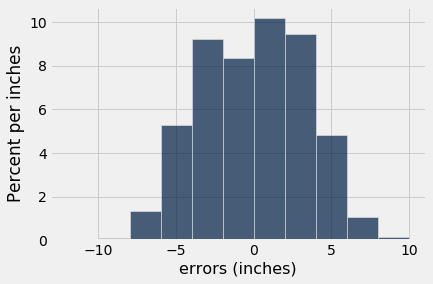

In [45]:
galton.hist('errors',bins=np.arange(-12,12,2),unit='inches')

#LetsChangeBins
#Itseemslikemostoftheerrorswherebweetn-4inchesand+4inches
#wewereaccurateby_+4

#heightofhisogram=percentageofindivualsinbin/widthofbin

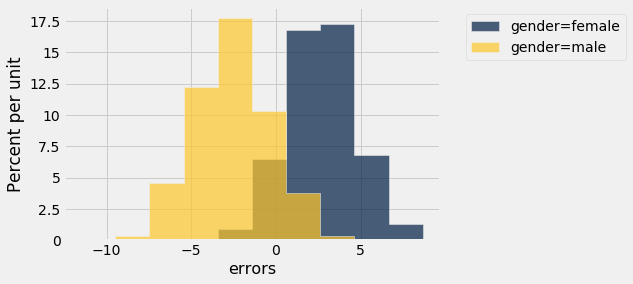

In [46]:
galton.hist('errors', group='gender')
#new_optional_argument_for_histogram-group=
#allows-ustogroupbygeneder

#here-weseemoreoftentheerrorformalesisnegavtive=predictionssmallerhieghtformales


# Discussion Question

In [19]:
def predict_smarter(h, g):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [20]:
predict_smarter(68, 'female')

62.909259259259265

In [21]:
predict_smarter(68, 'male')

68.57662337662337

In [22]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)

In [23]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)

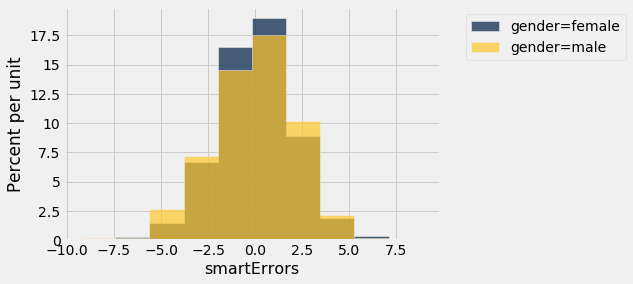

In [24]:
galton.hist('smartErrors', group='gender')

## Grouping by One Column ##

In [48]:
#WEwillreviwgroupingreals

cones = Table.read_table('cones.csv')
#hereistable
#table.group('column_name')->new_table_withcounts
#table.group('Column_name',applyfunction)->newtablewithresultoffunction


In [26]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [49]:
cones.group('Flavor')
cones.group('Color')#newtry


Color,count
dark brown,2
light brown,1
pink,3


In [50]:
cones.group('Flavor', np.average)#groupvsapply
#will_apply_np.average_to_all_columns_that_make_sense
#or_we_can_just_select_subtabletOapply

#seond->aggerages_and_apply_to_all_other_columns

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [51]:
cones.group('Flavor', min)

Flavor,Color min,Price min
bubblegum,pink,4.75
chocolate,dark brown,4.75
strawberry,pink,3.55


## Grouping By One Column: Welcome Survey ##

In [55]:
survey = Table.read_table('welcome_survey_v2.csv')

In [56]:
survey.group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average
First,5.8314,8.27326,7.12112
Fourth,5.37719,6.01754,7.13596
Fourth or above,6.33333,7.66667,7.2
Second,5.89051,7.47445,7.04623
Third,5.60837,5.71483,6.95913


In [57]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of textees average,Hours of sleep average
1,,3.28571,6.61905
2,,4.1087,6.78804
3,,5.31788,7.01987
4,,6.44134,7.06145
5,,6.64398,7.08639
6,,6.53571,7.10714
7,,8.10484,7.10282
8,,9.5625,7.09375
9,,9.81429,7.09286
10,,10.7143,7.2619


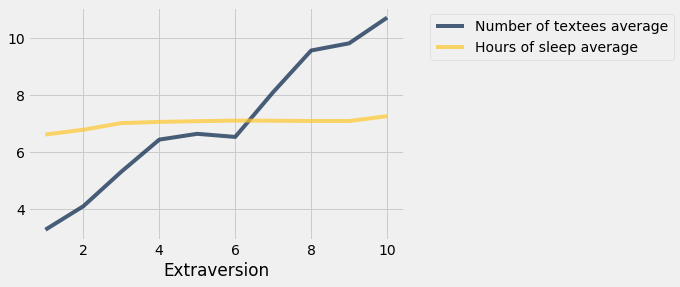

In [58]:
by_extra.select(0,2,3).plot('Extraversion') # Drop the 'Years average' column

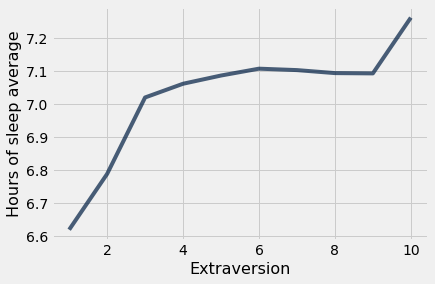

In [59]:
by_extra.select(0,3).plot('Extraversion')

## Lists

In [53]:
#Lists_are_python_specific_arrays
#They_allow_multiple_data_types
#to_delcare_we_use[]

example_list=['Hey','IM',1,'list']
print(example_list)

#Any_data_type_can_go_into_a_list

[1, 5, 'hello', 5.0]

#Why_do_we_care_about_lists?
#Lists_can_alsoBeusedtocreattablerows!

['Hey', 'IM', 1, 'list']


[1, 5, 'hello', 5.0]

In [58]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

[1, 5, 'hello', 5.0, array([1, 2, 3])]

## Grouping by Two Columns ##

In [43]:
survey = Table.read_table('welcome_survey_v3.csv')

In [44]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,268
Right-handed,On your left side,344


## Pivot Tables

In [45]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,268,344,398,199


In [46]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,7,5.8,5.28571,8
Left-handed,5.45161,5.33333,5.56667,6.75
Right-handed,5.57836,5.70349,5.93467,5.90452


In [47]:
survey.group('Handedness', np.average)

Handedness,Year average,Extraversion average,Number of textees average,Hours of sleep average,Sleep position average
Both,,6,7.64706,6.79412,
Left-handed,,5.61,6.88,7.0475,
Right-handed,,5.78495,7.34243,7.0761,
